# Imports

In [24]:
# تحميل المكتبات اللازمة
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import joblib
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import lime
import lime.lime_tabular
import shap


In [23]:
# !pip install lime shap

# تنبؤ العقارات (تنبؤ OutcomeVariable)

# المعلومات العامة

- OutcomeVariable: المقياس الأساسي الذي نهدف إلى التنبؤ به أو تحليله لكل عنصر في مجموعة البيانات.
- BuildingCategory: رمز رقمي يصنف النوع الهيكلي العام للعنصر.
- ZoningClassification: فئة الاستخدام المحددة للمنطقة التي يقع فيها العنصر.
- StreetLineLength: طول واجهة العنصر على الشارع بوحدات خطية.
- ParcelSize: المساحة الإجمالية للأرض المرتبطة بالعنصر، مقاسة بوحدات مربعة.
- RoadAccessType: نوع الطريق الذي يوفر الوصول إلى موقع العنصر.
- AlleyAccessType: نوع الوصول إلى الزقاق المتاح لموقع العنصر (إن وجد).
- ParcelShape: الشكل الهندسي العام لقطعة الأرض.
- TerrainFlatness: وصف لمستوى الأرض أو انحدارها.
- UtilityAvailability: أنواع خدمات المرافق المتاحة في موقع العنصر.
- ParcelSettings: تكوينات أو ميزات محددة لقطعة الأرض.
- TerrainSlope: درجة ميل الأرض.
- District: المناطق الجغرافية الفرعية أو المناطق داخل منطقة أكبر.
- RoadProximity1: يشير إلى قرب العنصر من طريق رئيسي أو مسار نقل.
- RoadProximity2: يشير إلى قرب العنصر من طريق رئيسي ثانٍ أو مسار، إن وجد.

# خصائص العنصر

- DwellingType: التصنيف المعماري المحدد للهيكل.
- DwellingStyle: النمط المعماري للهيكل.
- MaterialQuality: تصنيف الجودة العامة للمواد المستخدمة في بناء العنصر.
- ConditionRating: تقييم عام لحالة العنصر الحالية من حيث الصيانة والإصلاح.
- ConstructionYear: السنة التي بُني فيها العنصر أصلاً.
- RenovationYear: السنة التي شهد فيها العنصر تجديدًا كبيرًا أو إضافة.
- RoofType: نمط أو تصميم السقف.
- RoofMaterial: المادة الأساسية المستخدمة في بناء السقف.
- ExteriorCladding1: المادة الرئيسية التي تغطي الجزء الخارجي للعنصر.
- ExteriorCladding2: مادة تغطية خارجية ثانوية، إن وجدت.
- MasonryType: نوع العمل الزخرفي بالطوب المستخدم في الجزء الخارجي للعنصر.
- MasonrySize: المساحة المغطاة بالطوب، مقاسة بوحدات مربعة.
- ExteriorQuality: جودة المواد المستخدمة في تغطية الجزء الخارجي.
- ExteriorCondition: الحالة الحالية للكسوة الخارجية.
- FoundationType: نوع الأساس الذي يدعم هيكل العنصر.

# الميزات الداخلية

- BasementHeight: تصنيف ارتفاع القبو بالنسبة لمستوى الأرض.
- BasementCondition: الحالة العامة لمساحة القبو.
- BasementAccess: يصف ما إذا كان للقبو وصول مشاة أو عند مستوى الحديقة.
- BasementFinish1: جودة التشطيب في المنطقة الرئيسية المنتهية من القبو.
- BasementFinishedArea1: مساحة المنطقة الرئيسية المنتهية في القبو، مقاسة بوحدات مربعة.
- BasementFinish2: جودة التشطيب في منطقة ثانية منتهية في القبو (إن وجدت).
- BasementFinishedArea2: مساحة منطقة ثانية منتهية في القبو، مقاسة بوحدات مربعة.
- BasementUnfinishedArea: مساحة الجزء غير المنتهي من القبو، مقاسة بوحدات مربعة.
- TotalBasementArea: المساحة الإجمالية للقبو، بما في ذلك المناطق المنتهية وغير المنتهية، مقاسة بوحدات مربعة.
- HeatingType: النظام المستخدم لتدفئة العنصر.
- HeatingQuality: جودة وحالة نظام التدفئة.
- AirConditioning: يشير إلى ما إذا كان العنصر يحتوي على تكييف مركزي.
- ElectricalSystem: نوع النظام الكهربائي المثبت.
- GroundFloorArea: مساحة الطابق الأرضي، مقاسة بوحدات مربعة.
- UpperFloorArea: مساحة الطابق العلوي(الطوابق)، مقاسة بوحدات مربعة.
- LowQualityArea: مساحة العنصر المنتهية بمعايير أقل، مقاسة بوحدات مربعة.
- LivingArea: المساحة الإجمالية للمعيشة فوق مستوى الأرض، مقاسة بوحدات مربعة.
- BasementFullBathrooms: عدد الحمامات الكاملة في القبو.
- BasementHalfBathrooms: عدد الحمامات النصفية في القبو.
- FullBathrooms: عدد الحمامات الكاملة فوق مستوى الأرض.
- HalfBathrooms: عدد الحمامات النصفية فوق مستوى الأرض.
- Bedrooms: عدد غرف النوم في العنصر.
- Kitchens: عدد المطابخ في العنصر.
- KitchenQuality: جودة تشطيبات وتركيبات المطبخ.
- TotalRooms: العدد الإجمالي للغرف فوق مستوى الأرض، باستثناء الحمامات.
- FunctionalityRating: تصنيف الوظائف العامة وتخطيط العنصر.
- FireplaceCount: عدد المواقد في العنصر.
- FireplaceQuality: جودة الموقد (المواقد).

# الميزات الإضافية

- GarageLocation: موقع المرآب بالنسبة للعنصر.
- GarageConstructionYear: السنة التي بُني فيها المرآب.
- GarageInterior: التشطيب الداخلي للمرآب.
- GarageCapacity: عدد المركبات التي يمكن أن يستوعبها المرآب.
- GarageSize: مساحة المرآب، مقاسة بوحدات مربعة.
- GarageQuality: جودة بناء المرآب.
- GarageCondition: الحالة الحالية للمرآب.
- DrivewayType: يشير إلى ما إذا كان الممر مرصوفًا.
- WoodDeckArea: مساحة سطح الخشب، مقاسة بوحدات مربعة.
- OpenPorchArea: مساحة الشرفة المفتوحة، مقاسة بوحدات مربعة.
- EnclosedPorchArea: مساحة الشرفة المغلقة، مقاسة بوحدات مربعة.
- ThreeSeasonPorchArea: مساحة الشرفة التي تستخدم لثلاثة فصول، مقاسة بوحدات مربعة.
- ScreenPorchArea: مساحة الشرفة المسورة، مقاسة بوحدات مربعة.
- PoolSize: مساحة المسبح، مقاسة بوحدات مربعة.
- PoolQuality: جودة المسبح.
- FenceQuality: جودة السور.
- AdditionalFeature: ميزة إضافية غير مغطاة في الفئات الأخرى.
- AdditionalFeatureValue: القيمة المالية للميزة الإضافية.

# معلومات البيع

- SaleMonth: الشهر الذي تم فيه بيع العنصر.
- SaleYear: السنة التي تم فيها بيع العنصر.
- SaleType: طريقة أو نوع عملية البيع.
- SaleCondition: حالة البيع.

In [14]:
data = pd.read_csv('train.csv')

In [ ]:
data

# تجربة مبدئية عن طريق الشات 

In [10]:
# فصل البيانات إلى ميزات ومتغير الهدف
X = data.drop('OutcomeVariable', axis=1)
y = data['OutcomeVariable']

# تحديد الميزات العددية والكيفية
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# إنشاء المحول للميزات العددية والكيفية مع معالجة القيم الفارغة
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# إنشاء بايبلاين يتضمن المعالجة الأولية والنموذج
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# ضبط الهايبر باراميترز باستخدام GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')



R2 Score: 0.8842280142170962
Final pipeline steps: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'BuildingCategory', 'StreetLineLength', 'ParcelSize',
       'MaterialQuality', 'ConditionRating', 'ConstructionYear',
       'RenovationYear', 'MasonrySize', 'BasementFinishedArea1',
       'BasementFinish...
       'BasementFinish1', 'BasementFinish2', 'HeatingType', 'HeatingQuality',
       'AirConditioning', 'ElectricalSystem', 'KitchenQuality',
       'FunctionalityRating', 'FireplaceQuality', 'GarageLocation',
       'GarageInterior', 'Garag

In [ ]:
# grid_search.fit(X_train, y_train)

# # التنبؤ على مجموعة الاختبار
# y_pred = grid_search.predict(X_test)

# # حساب R-score
# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2}')

# # حفظ النموذج المدرب
# joblib.dump(grid_search.best_estimator_, 'best_model.pkl')

# # وصف البايبلاين النهائي
# final_pipeline = grid_search.best_estimator_
# print(f"Final pipeline steps: {final_pipeline}")

# بداية العمل الحقيقي


In [17]:
data.describe()

,Id,BuildingCategory,StreetLineLength,ParcelSize,MaterialQuality,ConditionRating,ConstructionYear,RenovationYear,MasonrySize,BasementFinishedArea1,...,WoodDeckArea,OpenPorchArea,EnclosedPorchArea,ThreeSeasonPorchArea,ScreenPorchArea,PoolSize,AdditionalFeatureValue,SaleMonth,SaleYear,OutcomeVariable
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
data.describe(include='object')

,ZoningClassification,RoadAccessType,AlleyAccessType,ParcelShape,TerrainFlatness,UtilityAvailability,ParcelSettings,TerrainSlope,District,RoadProximity1,...,GarageLocation,GarageInterior,GarageQuality,GarageCondition,DrivewayType,PoolQuality,FenceQuality,AdditionalFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [19]:
q=data.isnull().sum()
q[q!=0]

StreetLineLength           259
AlleyAccessType           1369
MasonryType                872
MasonrySize                  8
BasementHeight              37
BasementCondition           37
BasementAccess              38
BasementFinish1             37
BasementFinish2             38
ElectricalSystem             1
FireplaceQuality           690
GarageLocation              81
GarageConstructionYear      81
GarageInterior              81
GarageQuality               81
GarageCondition             81
PoolQuality               1453
FenceQuality              1179
AdditionalFeature         1406
dtype: int64

# طريقة الحل 
- أولاً نحتاج أن نقوم بحل مشكلة القيم الفارغة
- ثانياً نحتاج فحص الأعمده المهمه
- ثالثاً تطبيق خوارزميات التوقع 
- رابعاً وضع النتائج في داتا فريم أعمدته كل تجربة وسبب تجريبها وهل قامت بالتحسين ام لا 
- النتيجة الأخيرة هي البايبلاين الأمثل للموديل المطبق على الداتا، وضح ما هو البايبلاين بآخر خلية بالنوتبوك

### أولاً

In [54]:
def preprocess_data(data):
    X = data.drop('OutcomeVariable', axis=1)
    y = data['OutcomeVariable']

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor, X, y

### ثانياً

In [67]:
def tree_based_importance(data):
    preprocessor, X, y = preprocess_data(data)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    pipeline.fit(X, y)

    model = pipeline.named_steps['regressor']
    importances = model.feature_importances_

    feature_names = (X.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     pipeline.named_steps['preprocessor']
                     .transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X.select_dtypes(include=['object']).columns).tolist())

    # تحويل القيم لتكون مصفوفة
    shap_values = np.zeros((X.shape[0], len(feature_names)))
    for i in range(len(feature_names)):
        shap_values[:, i] = importances[i]

    shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X), feature_names=feature_names, plot_type="bar")


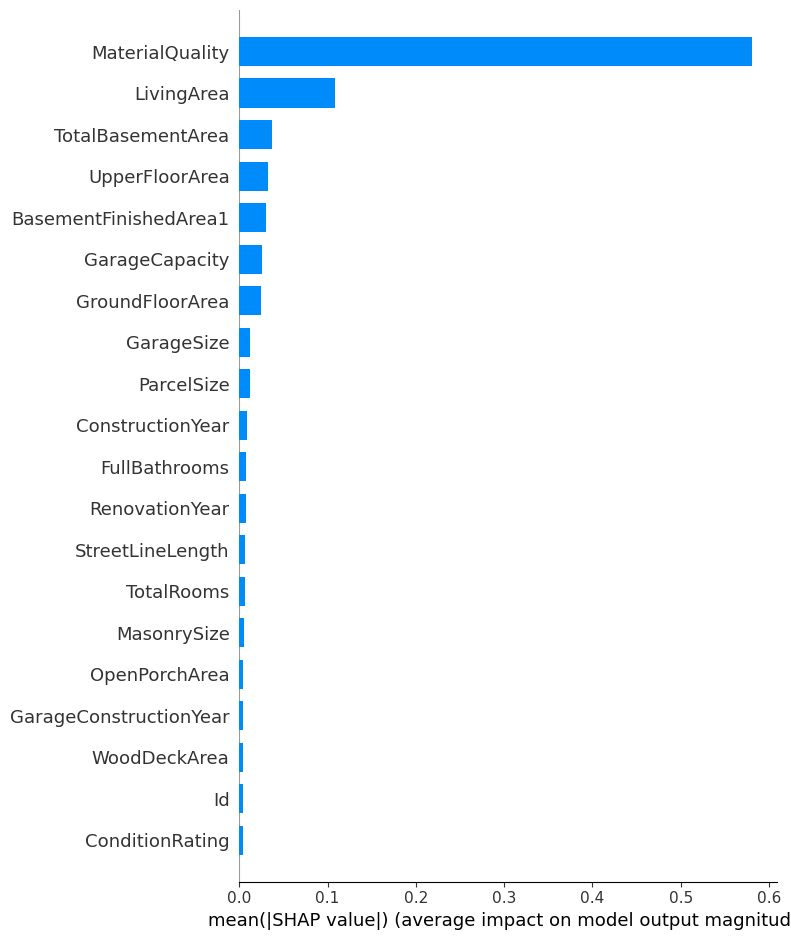

In [68]:
tree_based_importance(data)

In [69]:
def coefficient_based_importance(data):
    preprocessor, X, y = preprocess_data(data)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    pipeline.fit(X, y)

    model = pipeline.named_steps['regressor']
    coefficients = model.coef_

    feature_names = (X.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     preprocessor.transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X.select_dtypes(include=['object']).columns).tolist())

    # تحويل القيم لتكون مصفوفة
    shap_values = np.tile(coefficients, (X.shape[0], 1))

    shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X), feature_names=feature_names, plot_type="bar")


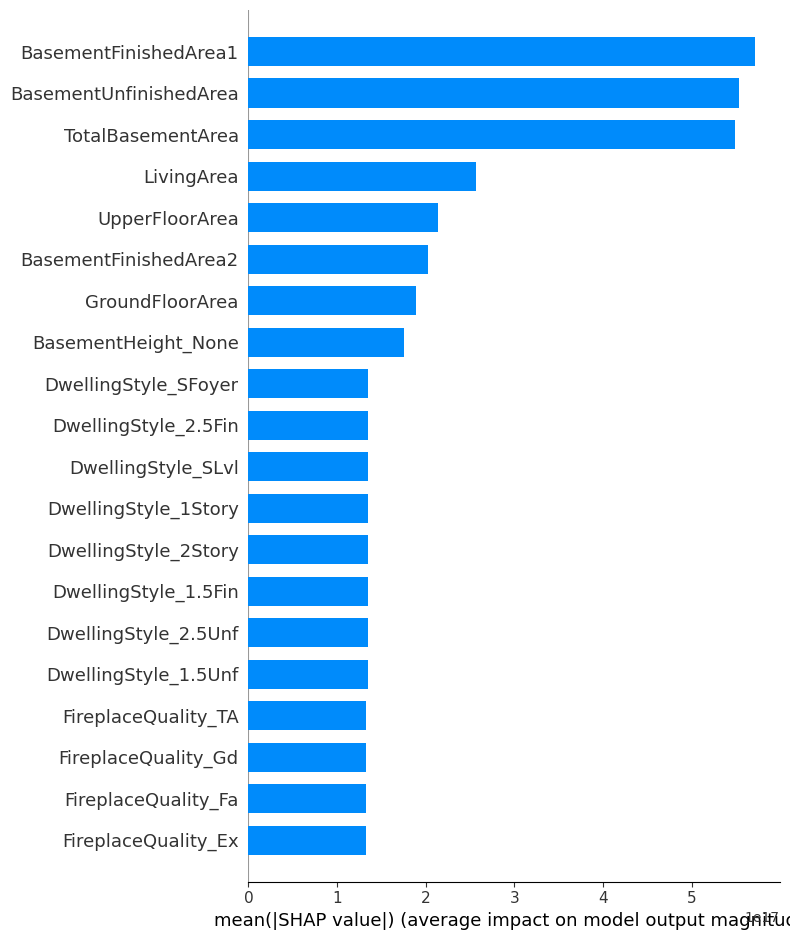

In [70]:
coefficient_based_importance(data)

In [71]:
def permutation_importance_method(data):
    preprocessor, X, y = preprocess_data(data)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    pipeline.fit(X, y)

    X_transformed = pipeline.named_steps['preprocessor'].transform(X)
    perm_importance = permutation_importance(pipeline.named_steps['regressor'], X_transformed, y, n_repeats=10, random_state=42)

    feature_names = (X.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     preprocessor.transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X.select_dtypes(include=['object']).columns).tolist())

    # تحويل القيم لتكون مصفوفة
    shap_values = np.tile(perm_importance.importances_mean, (X.shape[0], 1))

    shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names, plot_type="bar")


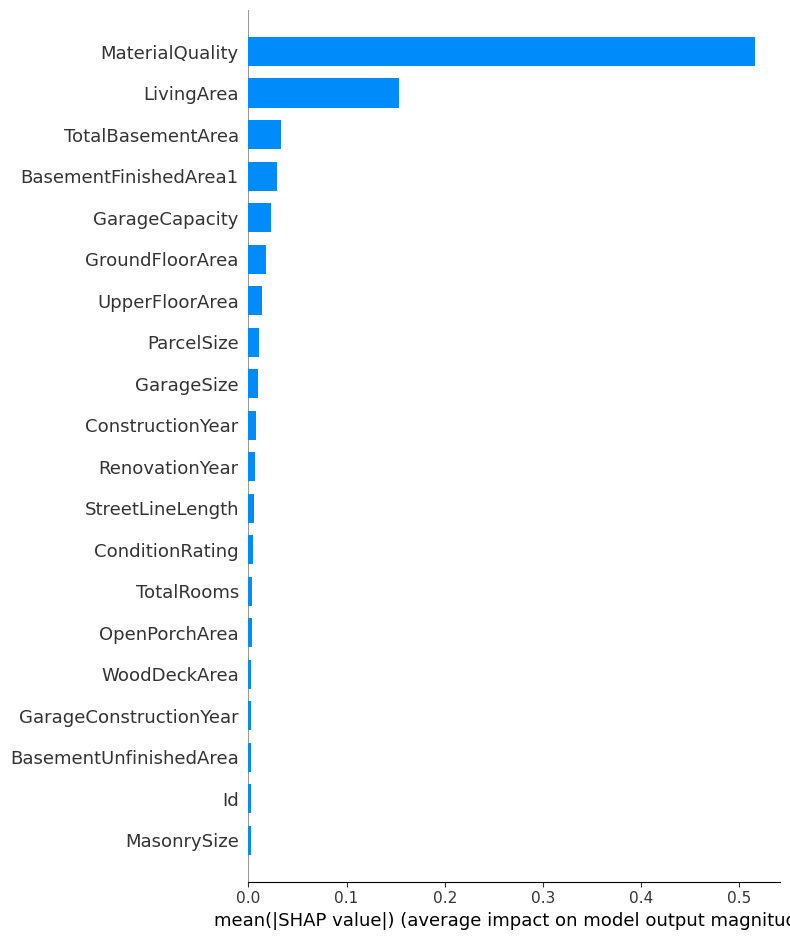

In [72]:
permutation_importance_method(data)

In [57]:
def shap_importance(data):
    preprocessor, X, y = preprocess_data(data)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    pipeline.fit(X, y)

    model = pipeline.named_steps['regressor']

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(pipeline.named_steps['preprocessor'].transform(X))

    feature_names = (X.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     pipeline.named_steps['preprocessor']
                     .transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X.select_dtypes(include=['object']).columns).tolist())

    shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X), feature_names=feature_names, plot_type="bar")


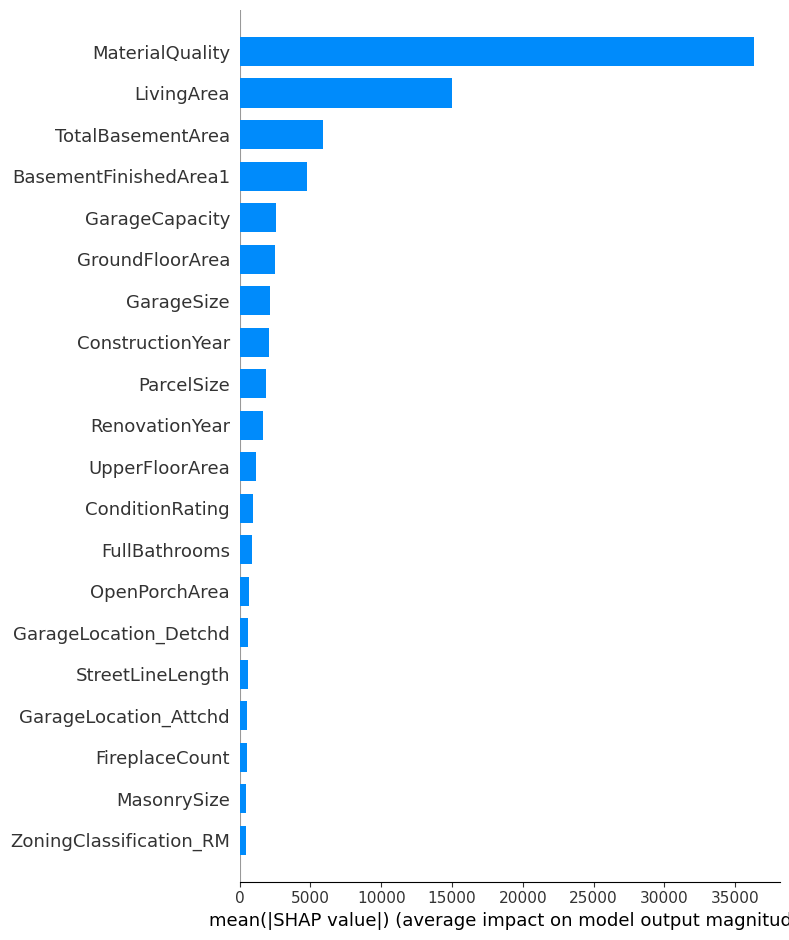

In [58]:
shap_importance(data)
